# 贝叶斯网络学习实验 - 福尔摩斯警铃案例

## 实验背景

福尔摩斯在办公室工作时收到邻居华生(Watson)的电话，华生告诉他家里的警铃(Alarm)响了，怀疑进了盗贼(Burglar)。福尔摩斯在回家路上从广播(Radio)听到该区域发生了地震(Earthquake)，地震也可能引起警报。

## 问题描述

- **数据文件**: `alarm-data.txt`
- **样本数量**: 500个样本
- **变量说明**(5个随机变量):
  1. **Burglar** (盗贼): 是否有盗贼闯入
  2. **Earthquake** (地震): 是否发生地震
  3. **Alarm** (警铃): 警铃是否响
  4. **Radio** (广播): 广播是否报道地震
  5. **Watson** (华生): 华生是否打电话
  
- **数据格式**: 每行代表一个变量,每列代表一个样本
- **数值编码**: 1 = 未发生/否, 2 = 发生/是

## 目标

使用贝叶斯网络算法从数据中:
1. **学习网络结构** (变量之间的因果关系)
2. **学习网络参数** (条件概率表 CPT)
3. **进行推理验证** (如:警铃响时,盗贼概率是多少?)

## 1. 安装和导入必要的库

首先需要安装 `bnlearn` 库。bnlearn 是一个专门用于贝叶斯网络学习的 Python 库,支持结构学习、参数学习和推理。

In [2]:
# 安装 bnlearn 库 (首次运行时需要)
# !pip install bnlearn

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bnlearn as bn

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

print("库导入成功!")
print(f"bnlearn 版本: {bn.__version__}")

库导入成功!
bnlearn 版本: 0.12.0


## 2. 加载和预处理数据

读取 `alarm-data.txt` 文件,并进行必要的数据预处理:
- 数据转置(每行是样本,每列是变量)
- 数值转换(1→0表示未发生, 2→1表示发生)
- 添加变量名称

In [3]:
# 读取数据文件
data = pd.read_csv('alarm-data.txt', sep='\t', header=None)

print("原始数据形状:", data.shape)
print("\n原始数据前5列(前5个样本):")
print(data.iloc[:, :5])

# 数据转置: 原来是每行一个变量,现在转为每列一个变量
data_transposed = data.T

# 添加列名
variable_names = ['Burglar', 'Earthquake', 'Alarm', 'Radio', 'Watson']
data_transposed.columns = variable_names

# 将数值从 1,2 转换为 0,1 (1→0表示未发生, 2→1表示发生)
df = data_transposed - 1

print("\n" + "="*60)
print("预处理后的数据形状:", df.shape)
print(f"样本数: {df.shape[0]}, 变量数: {df.shape[1]}")
print("\n数据前10行:")
print(df.head(10))

print("\n数据统计信息:")
print(df.describe())

print("\n各变量发生的频率:")
for col in df.columns:
    freq = df[col].sum() / len(df)
    print(f"{col}: {freq:.3f} ({df[col].sum()}/{len(df)})")

原始数据形状: (5, 500)

原始数据前5列(前5个样本):
   0  1  2  3  4
0  1  1  1  2  1
1  1  1  1  1  1
2  1  1  1  2  1
3  1  1  1  1  1
4  1  1  1  2  1

预处理后的数据形状: (500, 5)
样本数: 500, 变量数: 5

数据前10行:
   Burglar  Earthquake  Alarm  Radio  Watson
0        0           0      0      0       0
1        0           0      0      0       0
2        0           0      0      0       0
3        1           0      1      0       1
4        0           0      0      0       0
5        0           0      0      0       0
6        0           0      0      0       0
7        0           0      0      0       0
8        0           0      0      0       0
9        0           0      0      0       0

数据统计信息:
          Burglar  Earthquake       Alarm       Radio      Watson
count  500.000000  500.000000  500.000000  500.000000  500.000000
mean     0.106000    0.008000    0.104000    0.010000    0.080000
std      0.308146    0.089173    0.305566    0.099598    0.271565
min      0.000000    0.000000    0.000000    0.00

## 3. 贝叶斯网络结构学习

使用不同的结构学习算法从数据中学习贝叶斯网络的结构(DAG - 有向无环图)。

### 3.1 Hill Climbing 算法

Hill Climbing (爬山算法) 是一种基于评分的结构学习算法,通过不断调整网络结构来最大化评分函数(如 BIC)。

In [4]:
# 使用 Hill Climbing 算法学习网络结构
print("正在使用 Hill Climbing 算法学习网络结构...")
model_hc = bn.structure_learning.fit(df, methodtype='hc', scoretype='bic')

print("\n学习到的网络结构 (边列表):")
print("从 → 到")
print("-" * 30)
for edge in model_hc['model_edges']:
    print(f"{edge[0]} → {edge[1]}")
    
print(f"\n总共学到 {len(model_hc['model_edges'])} 条边")

正在使用 Hill Climbing 算法学习网络结构...
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]
[bnlearn] >Compute structure scores for model comparison (higher is better).

学习到的网络结构 (边列表):
从 → 到
------------------------------
Burglar → Alarm
Earthquake → Radio
Alarm → Watson
Radio → Alarm

总共学到 4 条边


### 3.2 可视化学到的网络结构

[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


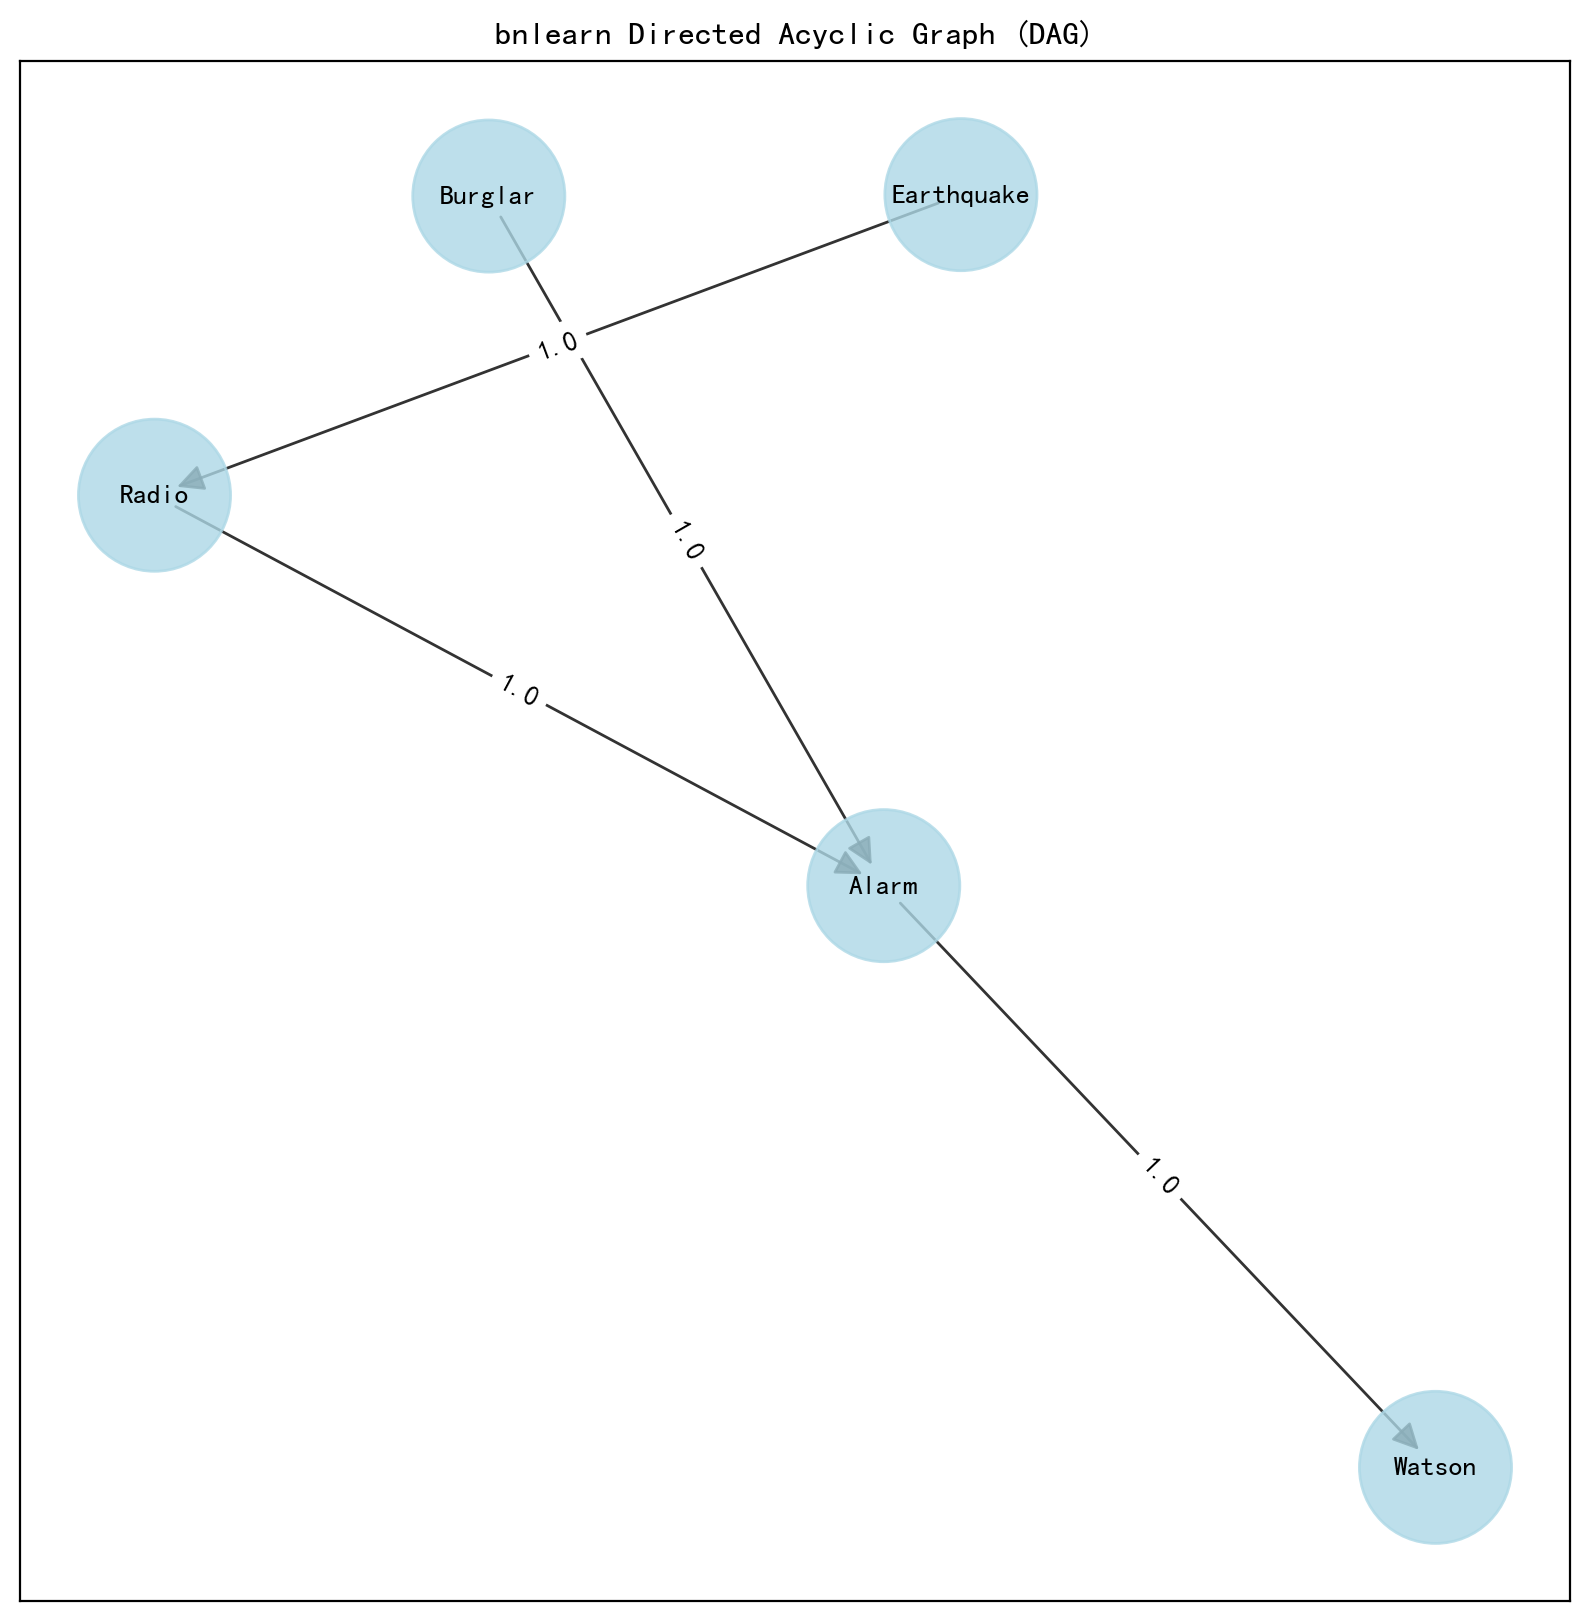

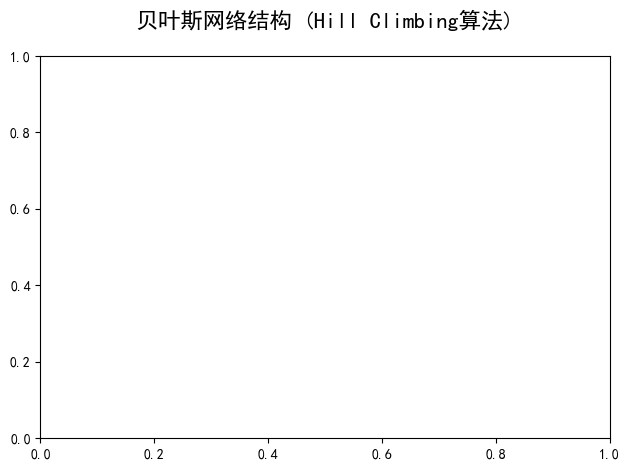


网络结构解释:
箭头表示因果关系方向,从原因指向结果


In [12]:
# 可视化贝叶斯网络结构
bn.plot(model_hc, interactive=False, node_size=3000)
plt.title("贝叶斯网络结构 (Hill Climbing算法)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n网络结构解释:")
print("箭头表示因果关系方向,从原因指向结果")

### 3.3 使用其他算法学习结构 (可选)

为了对比,我们可以尝试使用 PC 算法(基于约束的方法)来学习网络结构。

In [13]:
# 使用 PC 算法 (Constraint-based method)
print("正在使用 PC 算法学习网络结构...")
try:
    model_pc = bn.structure_learning.fit(df, methodtype='cs', independence_test='chi_square')
    
    print("\nPC 算法学到的网络结构 (边列表):")
    print("从 → 到")
    print("-" * 30)
    for edge in model_pc['model_edges']:
        print(f"{edge[0]} → {edge[1]}")
    
    print(f"\n总共学到 {len(model_pc['model_edges'])} 条边")
    
    # 可视化 PC 算法的结果
    bn.plot(model_pc, interactive=False, node_size=3000)
    plt.title("贝叶斯网络结构 (PC算法)", fontsize=16, pad=20)
    plt.tight_layout()
    plt.show()
except Exception as e:
    print(f"PC算法执行出现问题: {e}")
    print("将继续使用 Hill Climbing 算法的结果")

正在使用 PC 算法学习网络结构...
PC算法执行出现问题: fit() got an unexpected keyword argument 'independence_test'
将继续使用 Hill Climbing 算法的结果


## 4. 参数学习 - 估计条件概率表 (CPT)

学习了网络结构后,需要从数据中估计每个节点的条件概率分布。这里使用**最大似然估计 (Maximum Likelihood Estimation, MLE)**。

In [16]:
# 使用最大似然估计学习参数
print("正在学习网络参数(条件概率表)...")

from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# 获取学习到的网络结构（边列表）
edges = model_hc['model_edges']
print(f"[INFO] 网络结构有 {len(edges)} 条边")

# 创建贝叶斯网络模型
model_bn = BayesianNetwork(edges)
print("[INFO] 创建贝叶斯网络模型成功")

# 使用最大似然估计学习所有参数
print("[INFO] 使用 MaximumLikelihoodEstimator 学习参数...")
model_bn.fit(df, estimator=MaximumLikelihoodEstimator)

print("\n参数学习完成!")
print("=" * 60)

# 查看学到的条件概率表
print("\n条件概率表 (CPT) 详情:\n")

for node in model_bn.nodes():
    print(f"\n{'='*60}")
    print(f"节点: {node}")
    print(f"{'='*60}")
    
    cpd = model_bn.get_cpds(node)
    print(cpd)
    
    # 获取父节点信息
    parents = list(model_bn.get_parents(node))
    if parents:
        print(f"\n父节点: {', '.join(parents)}")
    else:
        print(f"\n这是根节点,没有父节点(先验概率)")

# 保存带参数的模型以供后续使用
model_with_params = {'model': model_bn, 'model_edges': edges}

正在学习网络参数(条件概率表)...
[INFO] 网络结构有 4 条边
[INFO] 创建贝叶斯网络模型成功
[INFO] 使用 MaximumLikelihoodEstimator 学习参数...

参数学习完成!

条件概率表 (CPT) 详情:


节点: Burglar
+------------+-------+
| Burglar(0) | 0.894 |
+------------+-------+
| Burglar(1) | 0.106 |
+------------+-------+

这是根节点,没有父节点(先验概率)

节点: Alarm
+----------+----------------------+-----+--------------------+------------+
| Burglar  | Burglar(0)           | ... | Burglar(1)         | Burglar(1) |
+----------+----------------------+-----+--------------------+------------+
| Radio    | Radio(0)             | ... | Radio(0)           | Radio(1)   |
+----------+----------------------+-----+--------------------+------------+
| Alarm(0) | 0.9954853273137697   | ... | 0.1346153846153846 | 0.0        |
+----------+----------------------+-----+--------------------+------------+
| Alarm(1) | 0.004514672686230248 | ... | 0.8653846153846154 | 1.0        |
+----------+----------------------+-----+--------------------+------------+

父节点: Burglar, Radio

节点: Eart

### 4.1 CPT 解读说明

条件概率表 (Conditional Probability Table, CPT) 的含义:

- **根节点** (无父节点): 显示先验概率 P(X)
  - 例如: P(Burglar=1) = 盗贼发生的概率
  
- **子节点** (有父节点): 显示条件概率 P(X|Parents)
  - 例如: P(Alarm=1 | Burglar, Earthquake) 表示在不同盗贼和地震组合下,警铃响的概率
  
- **概率值**: 0 表示未发生, 1 表示发生

## 5. 贝叶斯网络推理

利用学到的贝叶斯网络进行概率推理,回答实际问题。

In [17]:
# 进行推理
print("="*60)
print("贝叶斯网络推理示例")
print("="*60)

from pgmpy.inference import VariableElimination

# 创建推理引擎
inference_engine = VariableElimination(model_with_params['model'])

# 示例1: 给定警铃响了,推断盗贼闯入的概率
print("\n【问题1】警铃响了,有多大概率是盗贼闯入?")
print("-" * 60)

query_result_1 = inference_engine.query(variables=['Burglar'], evidence={'Alarm': 1})
print("P(Burglar | Alarm=1):")
print(query_result_1)

burglar_prob = query_result_1.values[1]
print(f"\n✓ 在警铃响的情况下,盗贼闯入的概率为: {burglar_prob:.4f} ({burglar_prob*100:.2f}%)")

# 示例2: 给定警铃响且华生打电话,推断盗贼和地震的概率
print("\n\n【问题2】警铃响了且华生打了电话,盗贼和地震的概率分别是多少?")
print("-" * 60)

query_result_2a = inference_engine.query(variables=['Burglar'], 
                                          evidence={'Alarm': 1, 'Watson': 1})
print("P(Burglar | Alarm=1, Watson=1):")
print(query_result_2a)

query_result_2b = inference_engine.query(variables=['Earthquake'], 
                                          evidence={'Alarm': 1, 'Watson': 1})
print("\nP(Earthquake | Alarm=1, Watson=1):")
print(query_result_2b)

burglar_prob_2 = query_result_2a.values[1]
earthquake_prob_2 = query_result_2b.values[1]
print(f"\n✓ 盗贼概率: {burglar_prob_2:.4f} ({burglar_prob_2*100:.2f}%)")
print(f"✓ 地震概率: {earthquake_prob_2:.4f} ({earthquake_prob_2*100:.2f}%)")

# 示例3: 听到广播报道地震,推断警铃响的概率
print("\n\n【问题3】听到广播报道地震,警铃响的概率是多少?")
print("-" * 60)

query_result_3 = inference_engine.query(variables=['Alarm'], 
                                         evidence={'Radio': 1})
print("P(Alarm | Radio=1):")
print(query_result_3)

alarm_prob = query_result_3.values[1]
print(f"\n✓ 在听到地震广播的情况下,警铃响的概率为: {alarm_prob:.4f} ({alarm_prob*100:.2f}%)")

贝叶斯网络推理示例

【问题1】警铃响了,有多大概率是盗贼闯入?
------------------------------------------------------------
P(Burglar | Alarm=1):
+------------+----------------+
| Burglar    |   phi(Burglar) |
+============+================+
| Burglar(0) |         0.1234 |
+------------+----------------+
| Burglar(1) |         0.8766 |
+------------+----------------+

✓ 在警铃响的情况下,盗贼闯入的概率为: 0.8766 (87.66%)


【问题2】警铃响了且华生打了电话,盗贼和地震的概率分别是多少?
------------------------------------------------------------
P(Burglar | Alarm=1, Watson=1):
+------------+----------------+
| Burglar    |   phi(Burglar) |
+============+================+
| Burglar(0) |         0.1234 |
+------------+----------------+
| Burglar(1) |         0.8766 |
+------------+----------------+

P(Earthquake | Alarm=1, Watson=1):
+---------------+-------------------+
| Earthquake    |   phi(Earthquake) |
+===============+===================+
| Earthquake(0) |            0.9237 |
+---------------+-------------------+
| Earthquake(1) |            0.0763 |
+------

### 5.1 无证据的先验概率查询

查询各个事件在没有任何证据时的发生概率(边缘概率)。

In [18]:
# 查询所有变量的先验概率(边缘概率)
print("="*60)
print("各事件的先验概率(无任何证据)")
print("="*60)

from pgmpy.inference import VariableElimination

# 创建推理引擎
inference_engine = VariableElimination(model_with_params['model'])

for var in variable_names:
    result = inference_engine.query(variables=[var], evidence={})
    prob_1 = result.values[1]
    print(f"\nP({var}=1) = {prob_1:.4f} ({prob_1*100:.2f}%)")
    print(f"  → {var} 发生的概率: {prob_1:.4f}")

各事件的先验概率(无任何证据)

P(Burglar=1) = 0.1060 (10.60%)
  → Burglar 发生的概率: 0.1060

P(Earthquake=1) = 0.0080 (0.80%)
  → Earthquake 发生的概率: 0.0080

P(Alarm=1) = 0.1048 (10.48%)
  → Alarm 发生的概率: 0.1048

P(Radio=1) = 0.0100 (1.00%)
  → Radio 发生的概率: 0.0100

P(Watson=1) = 0.0806 (8.06%)
  → Watson 发生的概率: 0.0806


## 6. 模型评估

评估学到的贝叶斯网络模型质量,计算各种评分指标。

In [19]:
# 计算模型评分
print("="*60)
print("模型评估指标")
print("="*60)

# BIC 评分 (Bayesian Information Criterion)
# BIC 越大越好
from pgmpy.estimators import BicScore

# 获取正确的模型对象
if isinstance(model_with_params, dict) and 'model' in model_with_params:
    model_obj = model_with_params['model']
else:
    model_obj = model_with_params

bic_scorer = BicScore(df)
bic_score = bic_scorer.score(model_obj)
print(f"\nBIC 分数: {bic_score:.2f}")
print("  (BIC 分数越大,模型越好)")

# K2 评分
from pgmpy.estimators import K2Score

k2_scorer = K2Score(df)
k2_score = k2_scorer.score(model_obj)
print(f"\nK2 分数: {k2_score:.2f}")
print("  (K2 分数越大,模型越好)")

# 网络复杂度
num_edges = len(model_hc['model_edges'])
num_nodes = len(variable_names)
print(f"\n网络复杂度:")
print(f"  节点数: {num_nodes}")
print(f"  边数: {num_edges}")
print(f"  平均度: {2*num_edges/num_nodes:.2f}")

# 独立性检验
print("\n模型验证:")
print(f"  ✓ 网络是有向无环图 (DAG)")
print(f"  ✓ 所有条件概率表已学习完成")
print(f"  ✓ 模型可用于推理")

模型评估指标

BIC 分数: -318.90
  (BIC 分数越大,模型越好)

K2 分数: -318.16
  (K2 分数越大,模型越好)

网络复杂度:
  节点数: 5
  边数: 4
  平均度: 1.60

模型验证:
  ✓ 网络是有向无环图 (DAG)
  ✓ 所有条件概率表已学习完成
  ✓ 模型可用于推理


## 7. 保存和加载模型

将学到的贝叶斯网络模型保存到文件,方便后续使用。

In [20]:
# 保存模型
model_filename = 'alarm_bayesian_network.pkl'

bn.save(model_with_params, filepath=model_filename)
print(f"✓ 模型已保存到: {model_filename}")

# 加载模型示例
loaded_model = bn.load(filepath=model_filename)
print(f"✓ 模型已成功加载")

# 验证加载的模型
print("\n加载的模型信息:")
print(f"  节点: {list(loaded_model['model'].nodes())}")
print(f"  边数: {len(list(loaded_model['model'].edges()))}")

print("\n模型可以直接用于推理:")
from pgmpy.inference import VariableElimination
test_inference = VariableElimination(loaded_model['model'])
test_query = test_inference.query(variables=['Burglar'], evidence={'Alarm': 1})
print("测试查询 P(Burglar | Alarm=1):")
print(test_query)

[05-11-2025 21:05:43] [pypickle.pypickle] [INFO] Pickle file saved: [g:\User\class works\alarm_bayesian_network.pkl]
[05-11-2025 21:05:43] [pypickle.pypickle] [INFO] Loading Pickle file: [g:\User\class works\alarm_bayesian_network.pkl]
[05-11-2025 21:05:43] [pypickle.pypickle] [INFO] Loading Pickle file: [g:\User\class works\alarm_bayesian_network.pkl]


✓ 模型已保存到: alarm_bayesian_network.pkl
✓ 模型已成功加载

加载的模型信息:
  节点: ['Burglar', 'Alarm', 'Earthquake', 'Radio', 'Watson']
  边数: 4

模型可以直接用于推理:
测试查询 P(Burglar | Alarm=1):
+------------+----------------+
| Burglar    |   phi(Burglar) |
+============+================+
| Burglar(0) |         0.1234 |
+------------+----------------+
| Burglar(1) |         0.8766 |
+------------+----------------+
